In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sn
import matplotlib.pyplot as plt
import time
import seaborn as sn
from tqdm.notebook import tqdm

from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

for dirname, _, filenames in os.walk(r"C:\Users\admin\Downloads\CodersCave\Task 4 dataset"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


TRAINED_MODELS_FOLDER = 'trained_models'
if not os.path.exists(TRAINED_MODELS_FOLDER):
    os.makedirs(TRAINED_MODELS_FOLDER)

STATS_FOLDER = 'stats'
if not os.path.exists(STATS_FOLDER):
    os.makedirs(STATS_FOLDER)

ANALYSIS_FOLDER = 'analysis'
if not os.path.exists(ANALYSIS_FOLDER):
    os.makedirs(ANALYSIS_FOLDER)

In [2]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)

In [4]:
train_df = pd.read_csv(r"/content/train_set.csv")
train_df.set_index('id', inplace=True)

val_df = pd.read_csv(r"/content/validation_set.csv")
val_df.set_index('id', inplace=True)

test_df = pd.read_csv(r"/content/validation_set.csv")
test_df.set_index('id', inplace=True)

tfidf_vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

tfidf_train_vectors = tfidf_vectorizer.fit_transform(train_df.feedback)
tfidf_val_vectors = tfidf_vectorizer.transform(val_df.feedback)
tfidf_test_vectors = tfidf_vectorizer.transform(test_df.feedback)

tfidf_train_vectors_clean = tfidf_vectorizer.fit_transform(train_df.feedback_clean)
tfidf_val_vectors_clean = tfidf_vectorizer.transform(val_df.feedback_clean)
tfidf_test_vectors_clean = tfidf_vectorizer.transform(test_df.feedback_clean)

count_vectorizer = CountVectorizer()
count_train_vectors = count_vectorizer.fit_transform(train_df.feedback)
count_val_vectors = count_vectorizer.transform(val_df.feedback)
count_test_vectors = count_vectorizer.transform(test_df.feedback)

count_train_vectors_clean = count_vectorizer.fit_transform(train_df.feedback_clean)
count_val_vectors_clean = count_vectorizer.transform(val_df.feedback_clean)
count_test_vectors_clean = count_vectorizer.transform(test_df.feedback_clean)

ml_train_labels = train_df.label
ml_test_tfidf_vectors = tfidf_test_vectors
ml_test_count_vectors = count_test_vectors
ml_test_labels = test_df.label

In [5]:
def run_classifier_experiment(input_train_vectors, train_labels, classifier = svm.SVC(kernel='linear')):
    t0 = time.time()
    classifier.fit(input_train_vectors, train_labels)
    t1 = time.time()
    time_linear_train = t1-t0
    print("Training time: %fs" % (time_linear_train))
    return classifier

def run_classifier_test(classifier, input_val_vectors, val_labels, description="default_experiment"):
    t3 = time.time()
    prediction = classifier.predict(input_val_vectors)
    t2 = time.time()
    time_linear_predict = t2-t3
    print("Prediction time: %fs" % (time_linear_predict))

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

    svm_val_report = classification_report(val_labels, prediction, output_dict=True, zero_division=0)

    weighted_avg_f1 = svm_val_report['weighted avg']['f1-score']
    test_plot = sn.heatmap(pd.DataFrame(svm_val_report).iloc[:-1, :].T, annot=True,cmap="YlGnBu", ax=ax[0], vmin=0, vmax=1)
    #test_plot.get_figure().savefig(STATS_FOLDER + f'/{description}.png')

    unique_labels = np.unique(val_labels)
    cm_prediction = confusion_matrix(val_labels, prediction, labels=unique_labels)
    cm_plot = sn.heatmap(cm_prediction, annot=True, annot_kws={"size": 16},cmap="YlGnBu", ax=ax[1], vmin=0, vmax=25)
    #cm_plot.get_figure().savefig(STATS_FOLDER + f'/{description}_cm.png')
    fig.suptitle(description, fontsize=12)
    fig.show()

    fig.savefig(STATS_FOLDER + f'/{description}_stats.png')

    return prediction, val_labels, weighted_avg_f1
def validate_classic_model(model_description, classifier, train_vectors, train_labels, test_vectors, test_labels, model_results_df):
    print("Configuration: %s" % (model_description))
    classic_model = run_classifier_experiment(train_vectors, train_labels, classifier = classifier)
    test_preds, test_labels, test_weighted_avg_f1 = run_classifier_test(classic_model, test_vectors, test_labels, description=model_description)
    model_results_df.loc[len(model_results_df)] = [model_description, test_weighted_avg_f1]

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

classic_model_results_df = pd.DataFrame(columns=['model_configuration','weighted_avg_f1'])

Configuration: multinomialMB_alpha_.2_tfidf
Training time: 0.003834s
Prediction time: 0.000908s
Configuration: multinomialMB_alpha_.2_tfidf_clean
Training time: 0.004494s
Prediction time: 0.000989s
Configuration: multinomialMB_alpha_.2_count
Training time: 0.004008s
Prediction time: 0.000797s
Configuration: multinomialMB_alpha_.2_count_clean
Training time: 0.003567s
Prediction time: 0.001041s
Configuration: SVC_linear_C1.1_tfidf
Training time: 0.312438s
Prediction time: 0.031450s
Configuration: SVC_linear_C1.1_tfidf_clean
Training time: 0.319451s
Prediction time: 0.031371s
Configuration: SVC_linear_C1.1_count
Training time: 0.384731s
Prediction time: 0.037890s
Configuration: SVC_linear_C1.1_count_clean
Training time: 0.383078s
Prediction time: 0.036039s
Configuration: SVC_default_rbf_C2.5_tfidf
Training time: 0.331174s
Prediction time: 0.035830s
Configuration: SVC_default_rbf_C2.5_tfidf_clean
Training time: 0.416102s
Prediction time: 0.046356s
Configuration: SVC_default_rbf_C2.5_count


<ipython-input-5-b4ac1e09ef57>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))


Configuration: LogisticRegression_lbfgs_tfidf_clean
Training time: 0.067797s
Prediction time: 0.001020s
Configuration: LogisticRegression_lbfgs_count
Training time: 4.950176s
Prediction time: 0.003478s
Configuration: LogisticRegression_lbfgs_count_clean
Training time: 2.708960s
Prediction time: 0.005216s


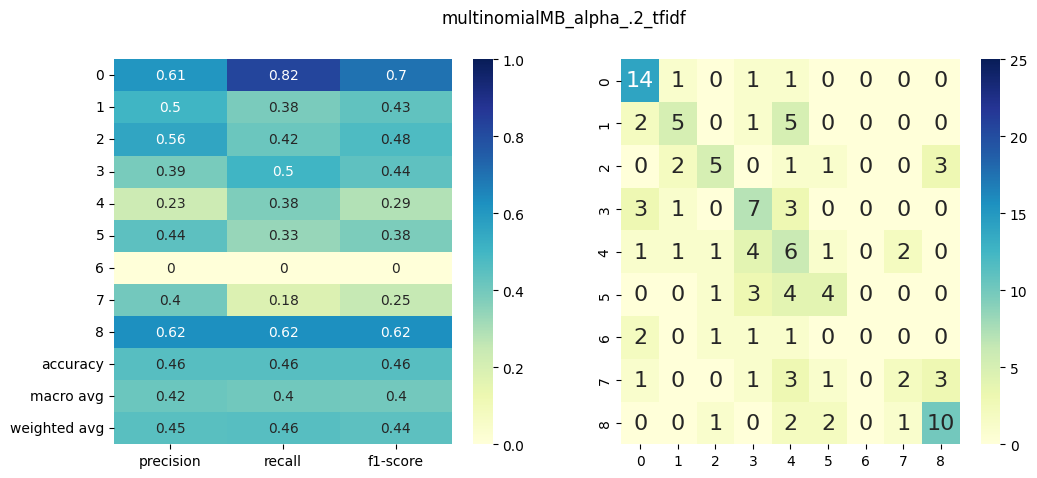

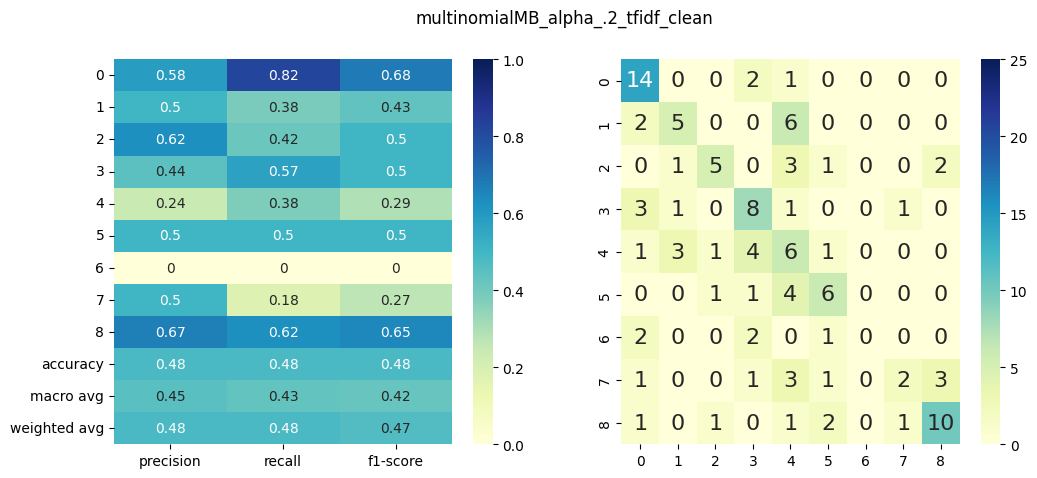

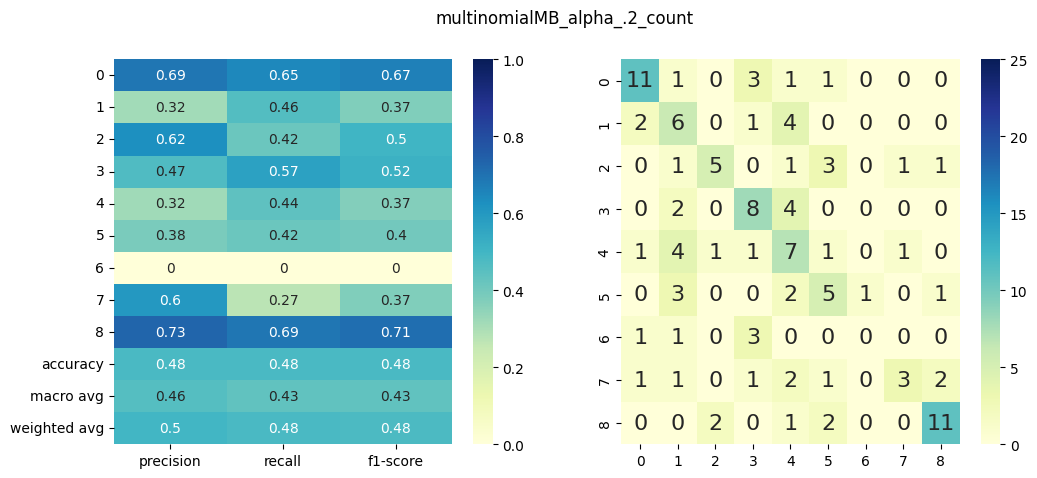

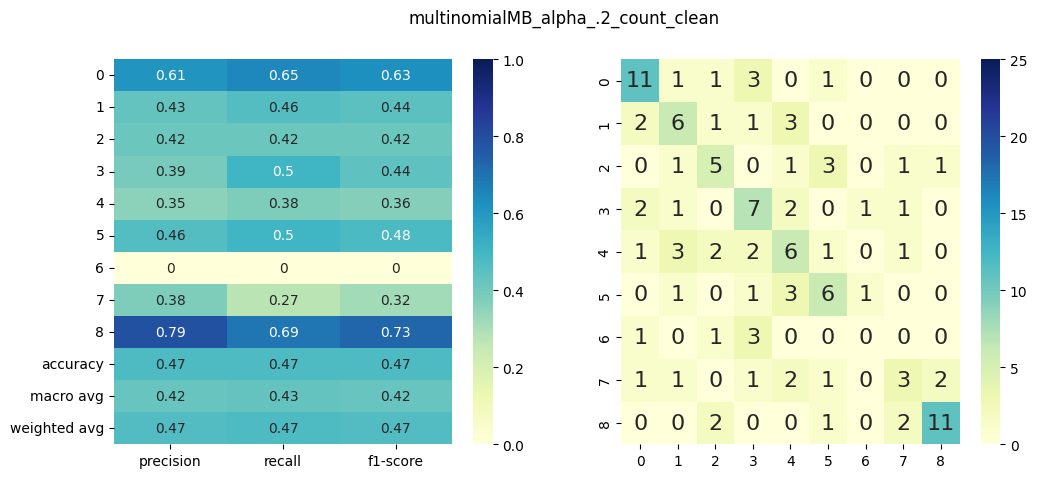

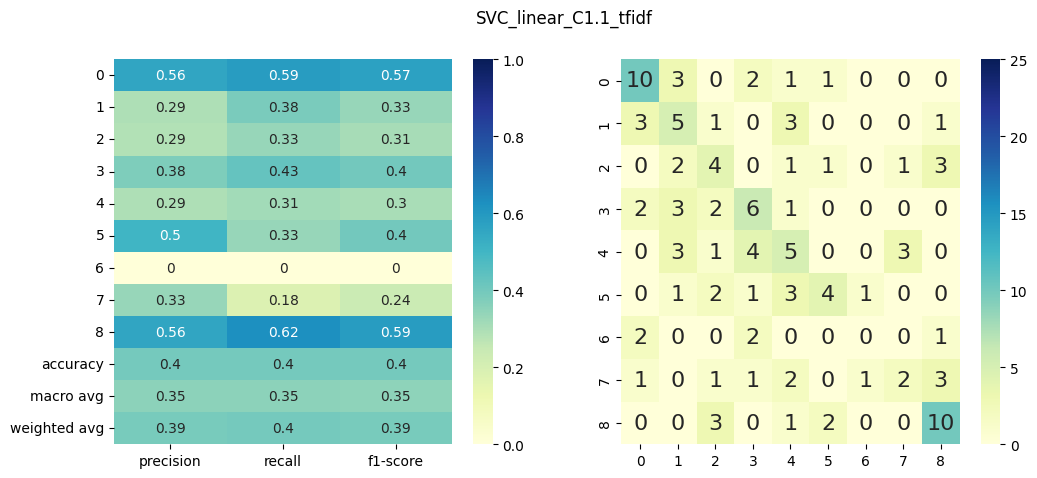

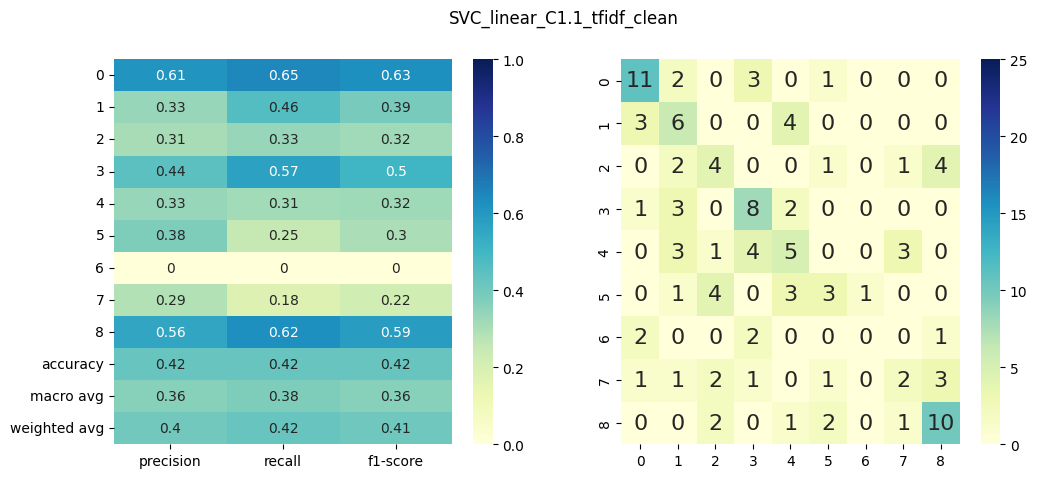

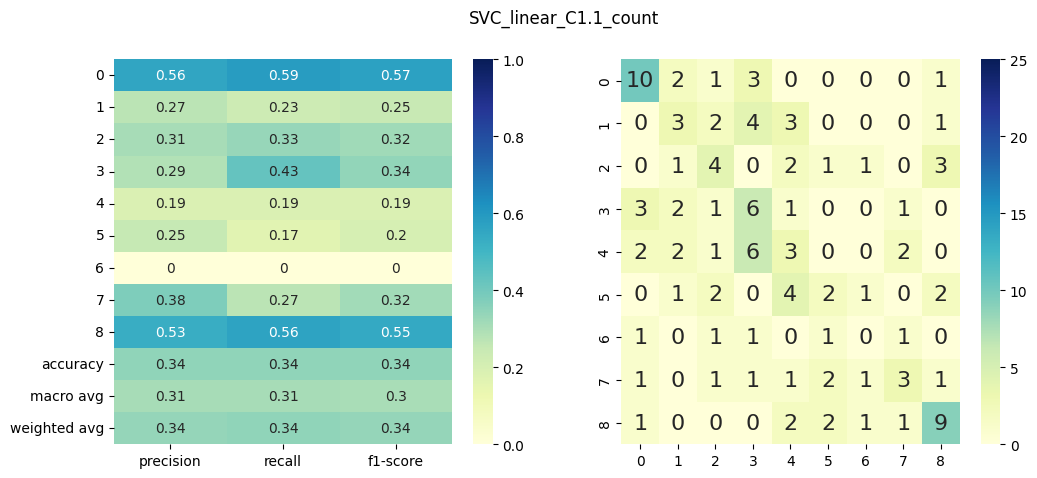

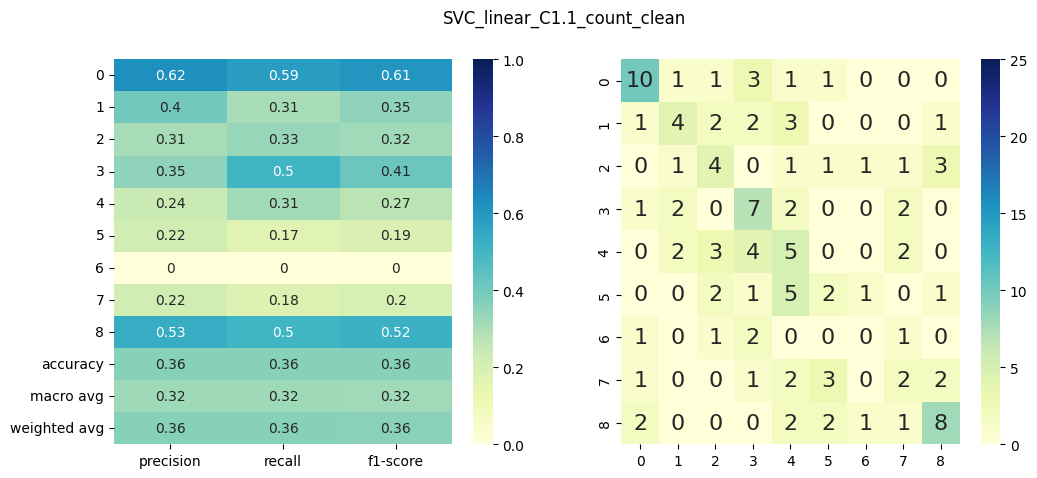

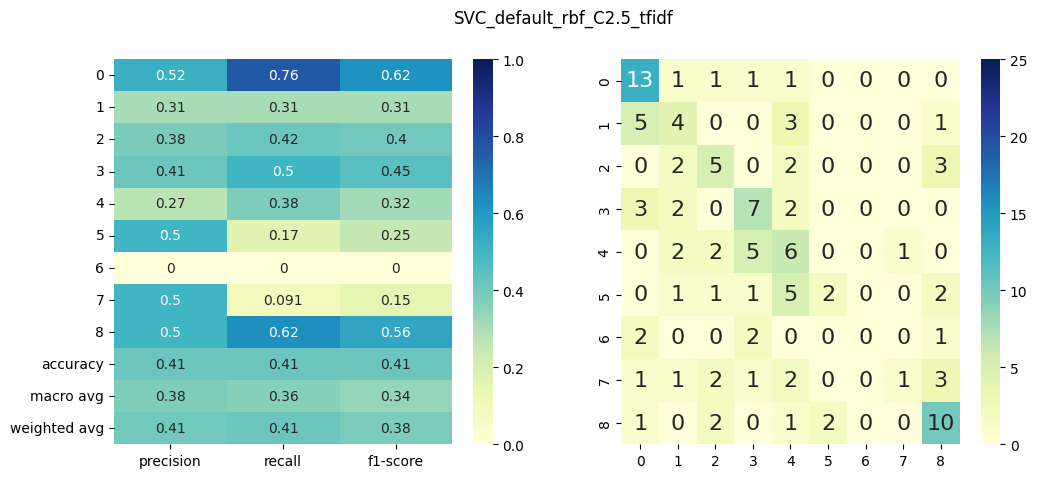

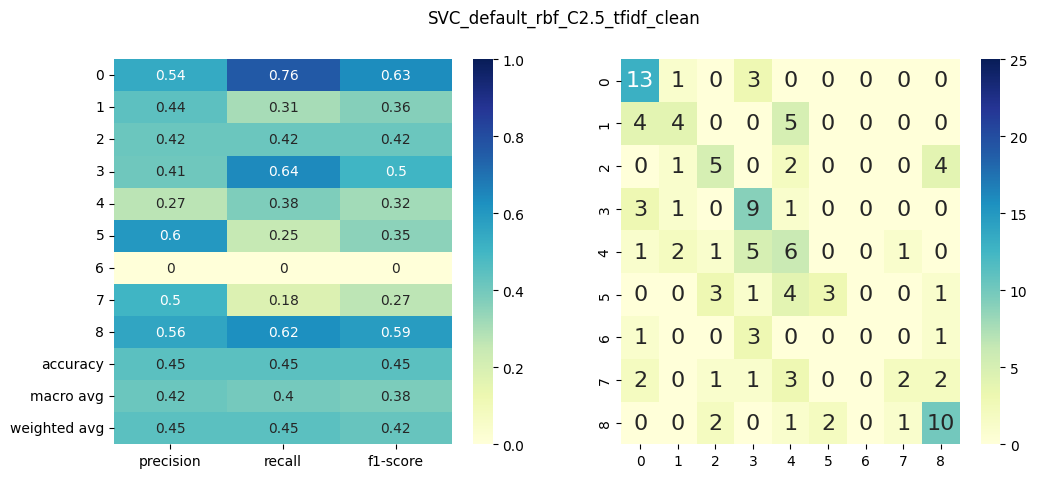

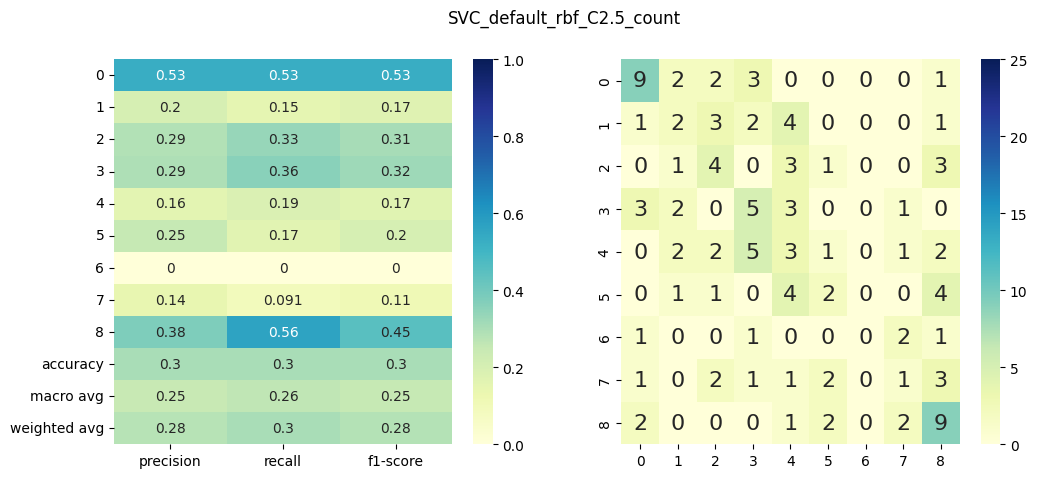

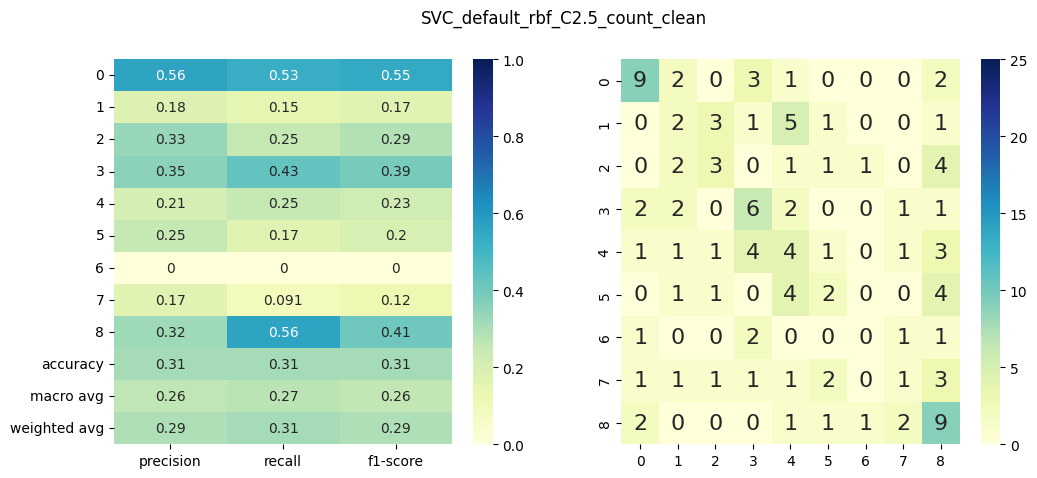

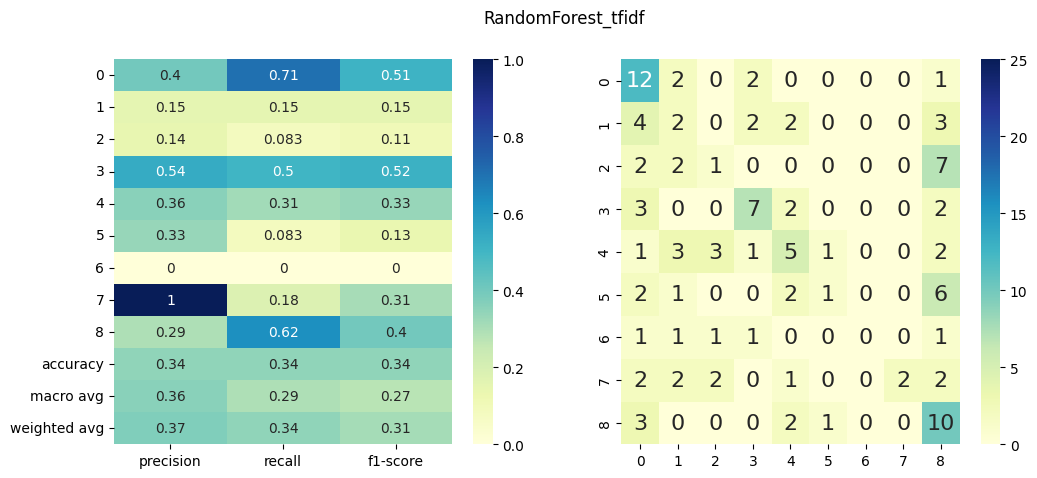

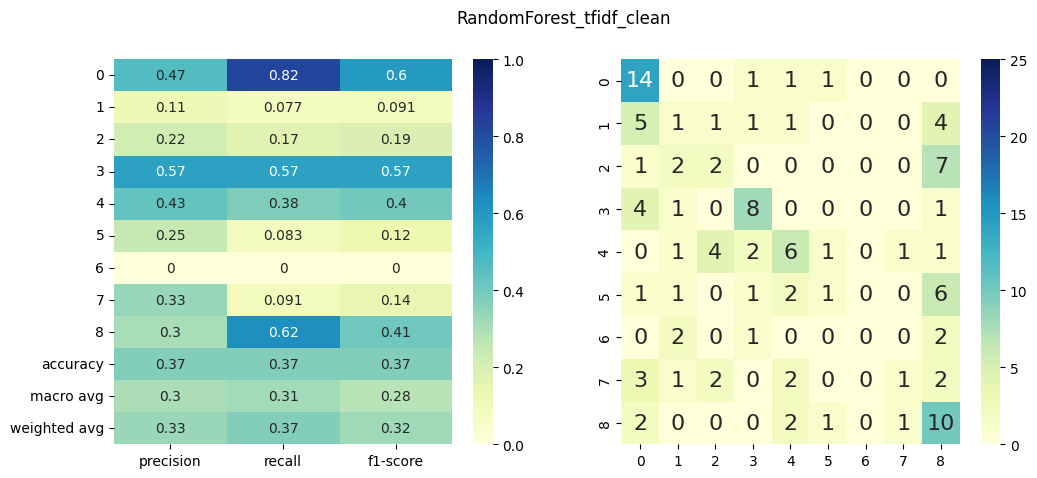

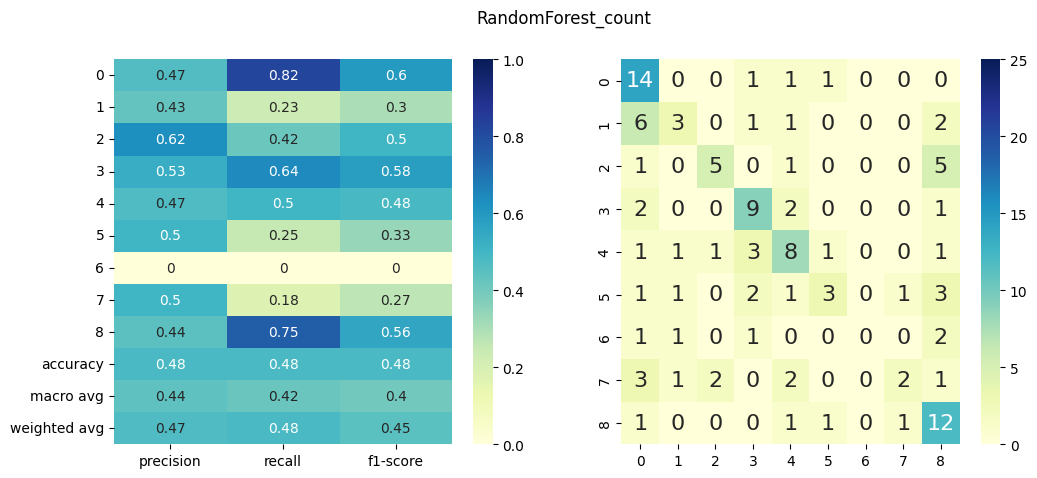

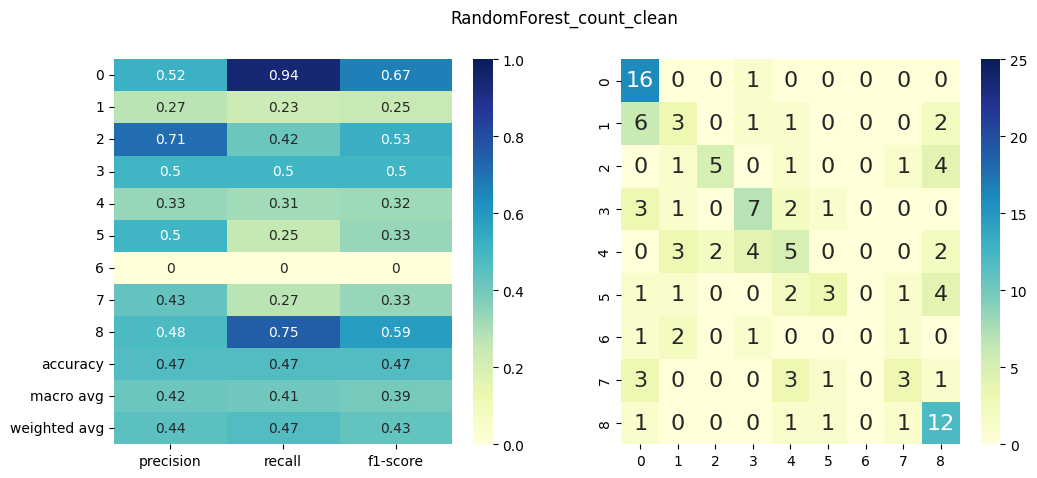

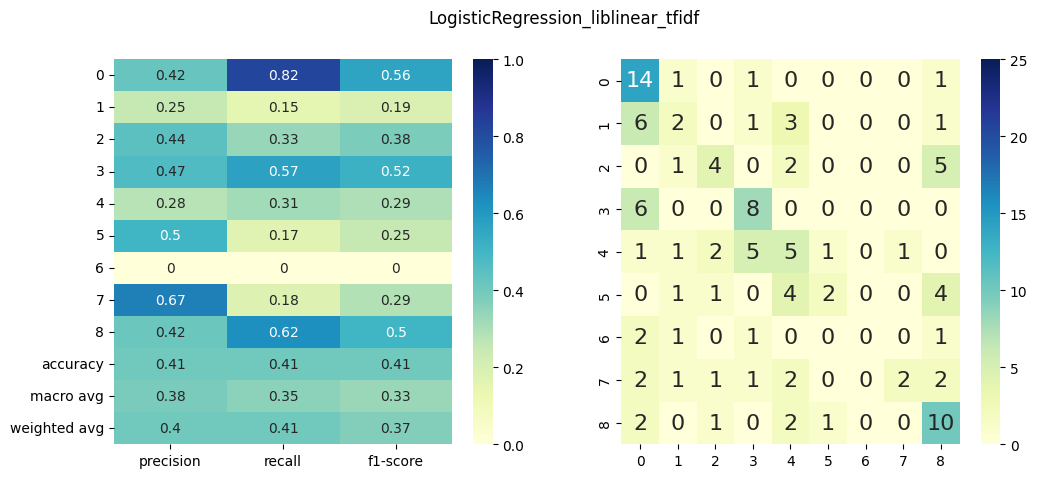

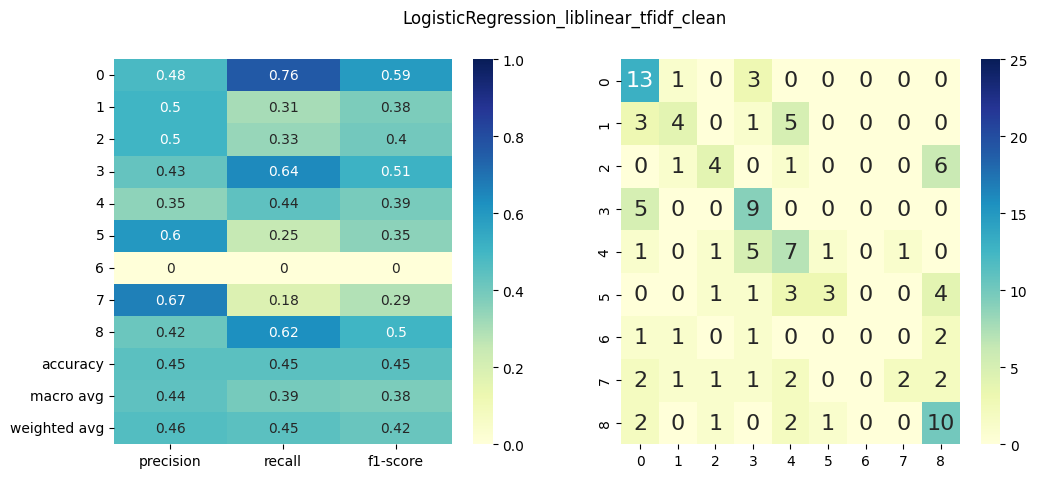

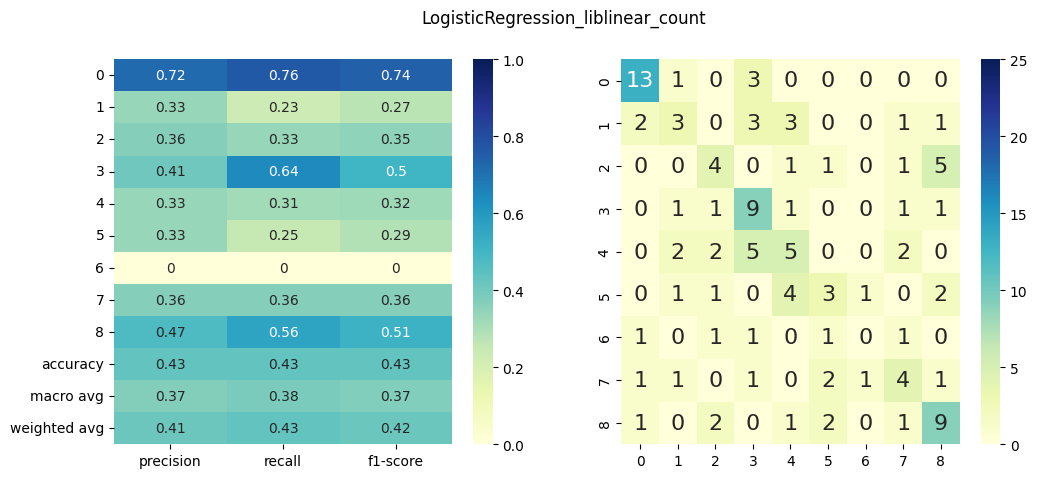

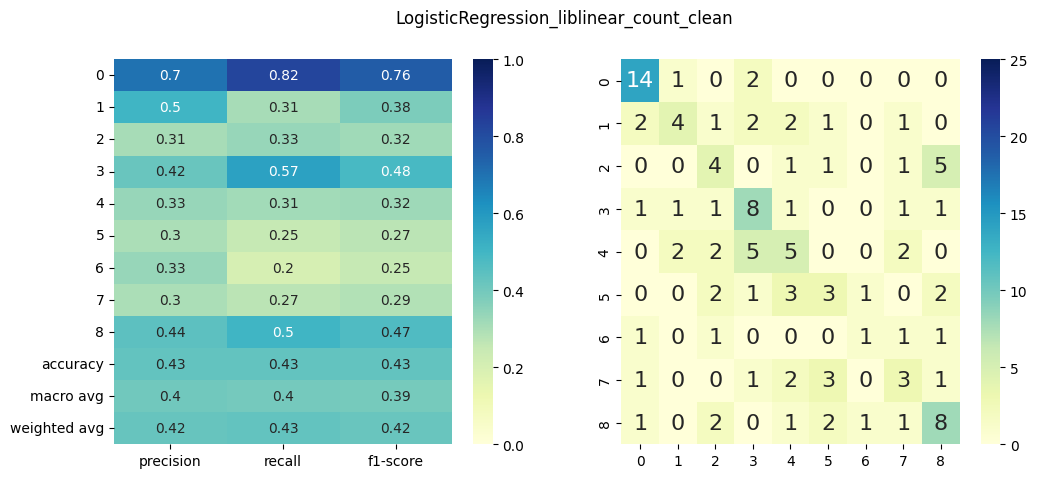

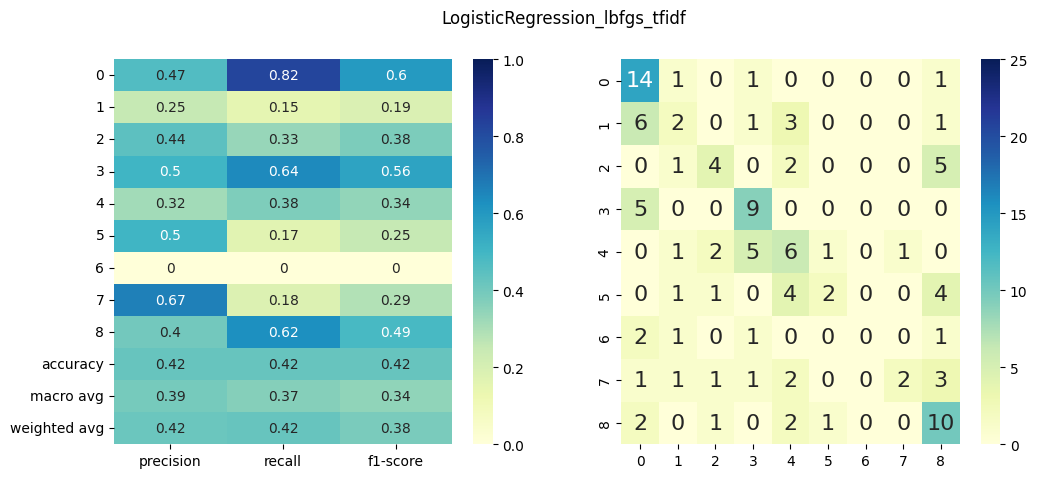

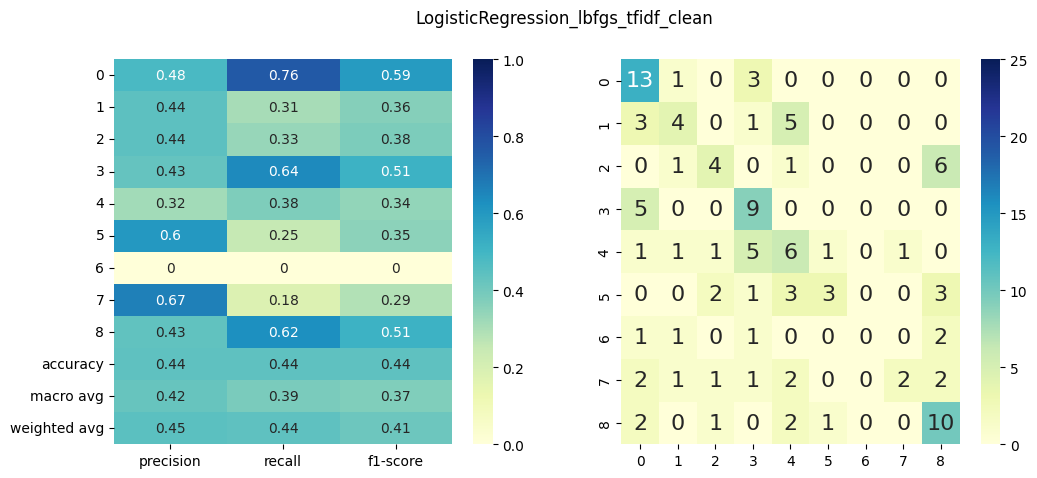

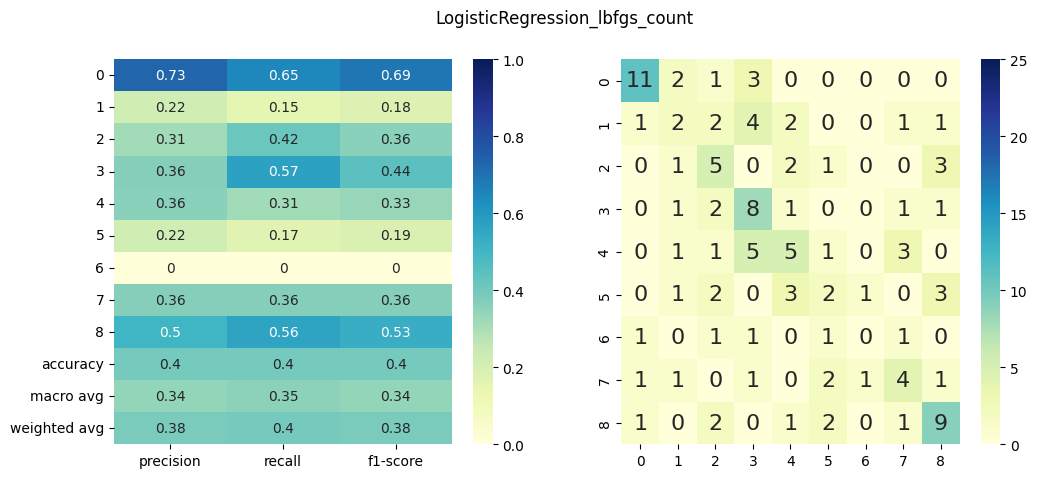

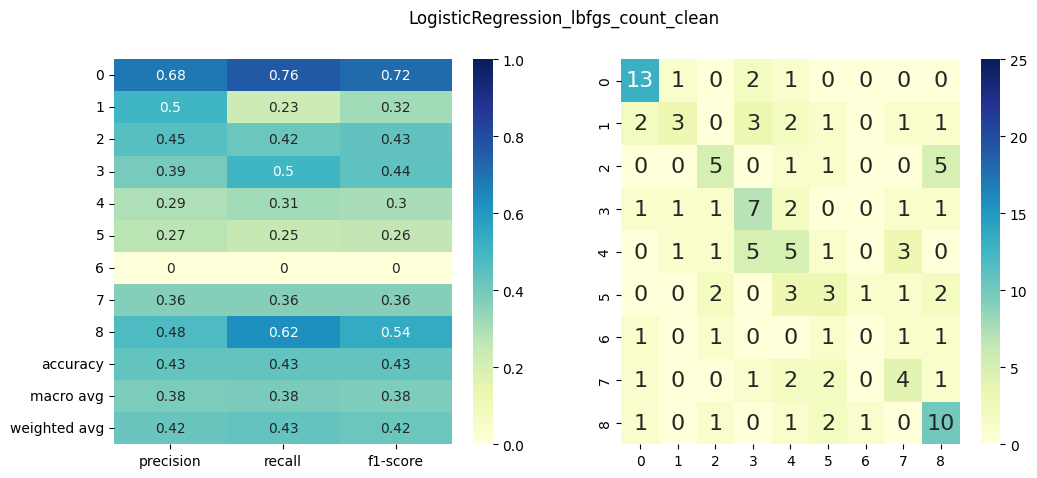

In [7]:
validate_classic_model(
    model_description = "multinomialMB_alpha_.2_tfidf",
    classifier = MultinomialNB(alpha=.2),
    train_vectors = tfidf_train_vectors,
    train_labels = ml_train_labels,
    test_vectors = ml_test_tfidf_vectors,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)

validate_classic_model(
    model_description = "multinomialMB_alpha_.2_tfidf_clean",
    classifier = MultinomialNB(alpha=.2),
    train_vectors = tfidf_train_vectors_clean,
    train_labels = ml_train_labels,
    test_vectors = tfidf_test_vectors_clean,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)

validate_classic_model(
    model_description = "multinomialMB_alpha_.2_count",
    classifier = MultinomialNB(alpha=.2),
    train_vectors = count_train_vectors,
    train_labels = ml_train_labels,
    test_vectors = ml_test_count_vectors,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)
validate_classic_model(
    model_description = "multinomialMB_alpha_.2_count_clean",
    classifier = MultinomialNB(alpha=.2),
    train_vectors = count_train_vectors_clean,
    train_labels = ml_train_labels,
    test_vectors = count_test_vectors_clean,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)

validate_classic_model(
    model_description = "SVC_linear_C1.1_tfidf",
    classifier = SVC(kernel='linear', C=1.1),
    train_vectors = tfidf_train_vectors,
    train_labels = ml_train_labels,
    test_vectors = ml_test_tfidf_vectors,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)

validate_classic_model(
    model_description = "SVC_linear_C1.1_tfidf_clean",
    classifier = SVC(kernel='linear', C=1.1),
    train_vectors = tfidf_train_vectors_clean,
    train_labels = ml_train_labels,
    test_vectors = tfidf_test_vectors_clean,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)

validate_classic_model(
    model_description = "SVC_linear_C1.1_count",
    classifier = SVC(kernel='linear', C=1.1),
    train_vectors = count_train_vectors,
    train_labels = ml_train_labels,
    test_vectors = ml_test_count_vectors,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)

validate_classic_model(
    model_description = "SVC_linear_C1.1_count_clean",
    classifier = SVC(kernel='linear', C=1.1),
    train_vectors = count_train_vectors_clean,
    train_labels = ml_train_labels,
    test_vectors = count_test_vectors_clean,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)

validate_classic_model(
    model_description = "SVC_default_rbf_C2.5_tfidf",
    classifier = SVC(kernel='rbf', C=2.5),
    train_vectors = tfidf_train_vectors,
    train_labels = ml_train_labels,
    test_vectors = ml_test_tfidf_vectors,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)

validate_classic_model(
    model_description = "SVC_default_rbf_C2.5_tfidf_clean",
    classifier = SVC(kernel='rbf', C=2.5),
    train_vectors = tfidf_train_vectors_clean,
    train_labels = ml_train_labels,
    test_vectors = tfidf_test_vectors_clean,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)

validate_classic_model(
    model_description = "SVC_default_rbf_C2.5_count",
    classifier = SVC(kernel='rbf', C=2.5),
    train_vectors = count_train_vectors,
    train_labels = ml_train_labels,
    test_vectors = ml_test_count_vectors,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)
validate_classic_model(
    model_description = "SVC_default_rbf_C2.5_count_clean",
    classifier = SVC(kernel='rbf', C=2.5),
    train_vectors = count_train_vectors_clean,
    train_labels = ml_train_labels,
    test_vectors = count_test_vectors_clean,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)

validate_classic_model(
    model_description = "RandomForest_tfidf",
    classifier = RandomForestClassifier(n_jobs=-1, random_state=17),
    train_vectors = tfidf_train_vectors,
    train_labels = ml_train_labels,
    test_vectors = ml_test_tfidf_vectors,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)
validate_classic_model(
    model_description = "RandomForest_tfidf_clean",
    classifier = RandomForestClassifier(n_jobs=-1, random_state=17),
    train_vectors = tfidf_train_vectors_clean,
    train_labels = ml_train_labels,
    test_vectors = tfidf_test_vectors_clean,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)

validate_classic_model(
    model_description = "RandomForest_count",
    classifier = RandomForestClassifier(n_jobs=-1, random_state=17),
    train_vectors = count_train_vectors,
    train_labels = ml_train_labels,
    test_vectors = ml_test_count_vectors,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)
validate_classic_model(
    model_description = "RandomForest_count_clean",
    classifier = RandomForestClassifier(n_jobs=-1, random_state=17),
    train_vectors = count_train_vectors_clean,
    train_labels = ml_train_labels,
    test_vectors = count_test_vectors_clean,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)

validate_classic_model(
    model_description = "LogisticRegression_liblinear_tfidf",
    classifier = LogisticRegression(fit_intercept=True, solver='liblinear'),
    train_vectors = tfidf_train_vectors,
    train_labels = ml_train_labels,
    test_vectors = ml_test_tfidf_vectors,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)
validate_classic_model(
    model_description = "LogisticRegression_liblinear_tfidf_clean",
    classifier = LogisticRegression(fit_intercept=True, solver='liblinear'),
    train_vectors = tfidf_train_vectors_clean,
    train_labels = ml_train_labels,
    test_vectors = tfidf_test_vectors_clean,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)

validate_classic_model(
    model_description = "LogisticRegression_liblinear_count",
    classifier = LogisticRegression(fit_intercept=True, solver='liblinear'),
    train_vectors = count_train_vectors,
    train_labels = ml_train_labels,
    test_vectors = ml_test_count_vectors,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)
validate_classic_model(
    model_description = "LogisticRegression_liblinear_count_clean",
    classifier = LogisticRegression(fit_intercept=True, solver='liblinear'),
    train_vectors = count_train_vectors_clean,
    train_labels = ml_train_labels,
    test_vectors = count_test_vectors_clean,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)

validate_classic_model(
    model_description = "LogisticRegression_lbfgs_tfidf",
    classifier = LogisticRegression(fit_intercept=True, solver='lbfgs'),
    train_vectors = tfidf_train_vectors,
    train_labels = ml_train_labels,
    test_vectors = ml_test_tfidf_vectors,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)
validate_classic_model(
    model_description = "LogisticRegression_lbfgs_tfidf_clean",
    classifier = LogisticRegression(fit_intercept=True, solver='lbfgs'),
    train_vectors = tfidf_train_vectors_clean,
    train_labels = ml_train_labels,
    test_vectors = tfidf_test_vectors_clean,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)

validate_classic_model(
    model_description = "LogisticRegression_lbfgs_count",
    classifier = LogisticRegression(fit_intercept=True, solver='lbfgs', max_iter=200),
    train_vectors = count_train_vectors,
    train_labels = ml_train_labels,
    test_vectors = ml_test_count_vectors,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)
validate_classic_model(
    model_description = "LogisticRegression_lbfgs_count_clean",
    classifier = LogisticRegression(fit_intercept=True, solver='lbfgs', max_iter=200),
    train_vectors = count_train_vectors_clean,
    train_labels = ml_train_labels,
    test_vectors = count_test_vectors_clean,
    test_labels = ml_test_labels,
    model_results_df = classic_model_results_df
)

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True],
     'max_depth': [6, 10],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [3, 5],
     'min_samples_split': [4, 6],
     'n_estimators': [100, 350]
    }


forest_clf = RandomForestClassifier()

forest_grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                                  scoring="accuracy",
                                  return_train_score=True,
                                  verbose=True,
                                  n_jobs=-1)

forest_grid_search.fit(tfidf_train_vectors, ml_train_labels)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [6, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 350]},
             return_train_score=True, scoring='accuracy', verbose=True)

In [9]:
forest_grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 350}

In [11]:
classic_model_results_df.index += 1
classic_model_results_df.to_csv(STATS_FOLDER +'/classic_model_results.csv')
print(classic_model_results_df)

print('\nWinner:')

print(classic_model_results_df.loc[classic_model_results_df['weighted_avg_f1'] == classic_model_results_df['weighted_avg_f1'].max()])

print('End of execution')

                         model_configuration  weighted_avg_f1
2               multinomialMB_alpha_.2_tfidf         0.442106
3         multinomialMB_alpha_.2_tfidf_clean         0.467248
4               multinomialMB_alpha_.2_count         0.479385
5         multinomialMB_alpha_.2_count_clean         0.468739
6                      SVC_linear_C1.1_tfidf         0.387831
7                SVC_linear_C1.1_tfidf_clean         0.406685
8                      SVC_linear_C1.1_count         0.337976
9                SVC_linear_C1.1_count_clean         0.357738
10                SVC_default_rbf_C2.5_tfidf         0.381726
11          SVC_default_rbf_C2.5_tfidf_clean         0.423627
12                SVC_default_rbf_C2.5_count         0.284779
13          SVC_default_rbf_C2.5_count_clean         0.294690
14                        RandomForest_tfidf         0.309666
15                  RandomForest_tfidf_clean         0.324114
16                        RandomForest_count         0.446361
17      